In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [38]:
'''
Adapted from code by Ian Osband
https://github.com/iosband/ts_tutorial/

Run experiment on extrasensory data
Policy: uniform random, posterior sampling
'''

import os
import sys
import argparse

import numpy as np
import pandas as pd
import plotnine as gg

from base.experiment import BaseExperiment
from al.env_al import ContextualBanditFunctionalContext
from al.agent_rl import PolicyGradientREINFORCE, UniformRandom
from al.env_al import normal_iid, uniform_iid, sinewave, linear_classifier
from al.policy import PolicyNN

sys.path.append(os.getcwd())

In [104]:
##############################################################################
# Running a single experiment

# true_theta = [1.0, 0.5]
unit_circle_angle = np.random.uniform(0, 2*np.pi) # sample 100-dim theta with first two non-zero and l2-norm theta=1
true_theta = [np.cos(unit_circle_angle), np.sin(unit_circle_angle)] + [0]*98
n_steps = 1000
seed = 0
args = argparse.Namespace() # From https://stackoverflow.com/questions/16878315/what-is-the-right-way-to-treat-python-argparse-namespace-as-a-dictionary
args.n_feat = len(true_theta)
args.optim = 'sgd'
args.learn_rate = 1e-3
args.momentum = 0.9 # only for SGD
args.gamma = 1 # discount factor
args.sample_cost = 1 # 0 <= cost
args.in_dim = 100 # input dim of policy
args.n_act = 2 # num actions

agent = PolicyGradientREINFORCE(PolicyNN, args) #UniformRandom(n_arm)
# env = ContextualBanditFunctionalContext(normal_iid, true_theta, linear_classifier)
env = ContextualBanditFunctionalContext(uniform_iid, true_theta, linear_classifier)
experiment = BaseExperiment(agent, env, n_steps=n_steps,
                            seed=seed, unique_id='example')

experiment.run_experiment()

pick_action [-0.20489611 -0.45727761]
pick_action [ 0.02854736 -0.40918438]
pick_action [-0.03786365 -0.63439242]
pick_action [ 0.0061844  -0.93997693]
pick_action [ 0.16596534 -0.94311117]
pick_action [-0.12990525 -1.01116228]
pick_action [ 0.01266572 -0.74948184]
pick_action [-0.14356626 -0.7028468 ]
pick_action [-0.1573591  -0.69387097]
pick_action [-0.1647052  -0.70513825]


179 0.179


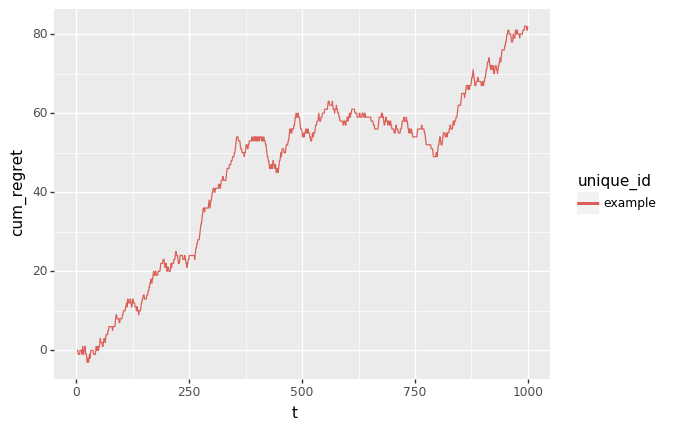

<ggplot: (7561257462)>


In [105]:
##############################################################################
# Simple display / plot of results

print(env.num_query, env.num_query/n_steps)

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='cum_regret', colour='unique_id')
     + gg.geom_line())
print(p)

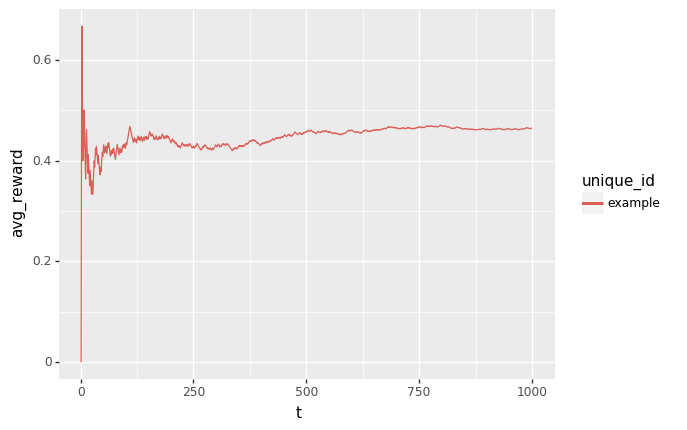

<ggplot: (7561952993)>
27 0.027


In [56]:
##############################################################################
# Simple display / plot of results

experiment.results.head()

p = (gg.ggplot(experiment.results)
     + gg.aes(x='t', y='avg_reward', colour='unique_id')
     + gg.geom_line())
print(p)

print(env.num_query, env.num_query/n_steps)

In [25]:
experiment.results

,t,instant_regret,cum_regret,action,unique_id,instant_reward,cum_reward,avg_reward,num_query,logger
0,1,1.0,1.0,"(0, 0.0)",example,0.0,0.0,0.000000,0,0.000000
1,2,1.0,2.0,"(1, 0.0)",example,0.0,0.0,0.000000,1,0.000000
2,3,0.0,2.0,"(1, -1.0)",example,1.0,1.0,0.333333,2,0.060560
3,4,1.0,3.0,"(1, -1.0)",example,0.0,1.0,0.250000,3,0.108289
4,5,1.0,4.0,"(0, -1.0)",example,0.0,1.0,0.200000,3,0.039724
...,...,...,...,...,...,...,...,...,...,...
995,996,1.0,548.0,"(0, 1.0)",example,0.0,448.0,0.449799,18,0.021611
996,997,1.0,549.0,"(0, 1.0)",example,0.0,448.0,0.449348,18,0.021611
997,998,0.0,549.0,"(0, -1.0)",example,1.0,449.0,0.449900,18,0.021611
998,999,0.0,549.0,"(0, 1.0)",example,1.0,450.0,0.450450,18,0.021611


In [75]:
agent.w_t

array([6.87233982, 3.49872687])

In [76]:
list(agent.policy.parameters())

[Parameter containing:
 tensor([[ 0.0551,  0.0078],
         [-0.0998,  0.3322]], requires_grad=True), Parameter containing:
 tensor([-0.0904, -0.1949], requires_grad=True), Parameter containing:
 tensor([[ 0.4307, -0.5423],
         [-0.1344, -0.4986]], requires_grad=True), Parameter containing:
 tensor([-3.5189,  4.0661], requires_grad=True)]

In [56]:
a=[np.sin(2*np.pi*10*(ts-1)/1000) + np.random.normal(loc=0.0, scale=0.1) for ts in range(1000)]
a=pd.DataFrame({'x':range(1000),'y':a})
p = (gg.ggplot(a)
     + gg.aes(x='x', y='y')
     + gg.geom_line())
print(p)

In [77]:
np.append(np.array([1,2]),23)

array([ 1,  2, 23])